Communication channel:
    https://www.nengo.ai/nengo-loihi/examples/communication-channel.html

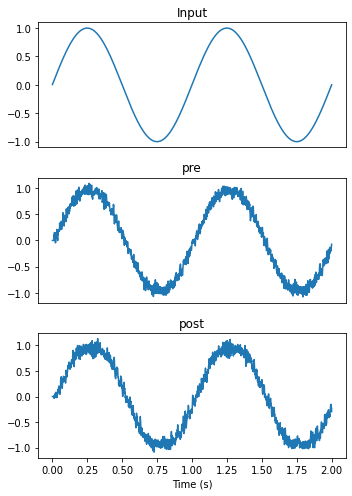

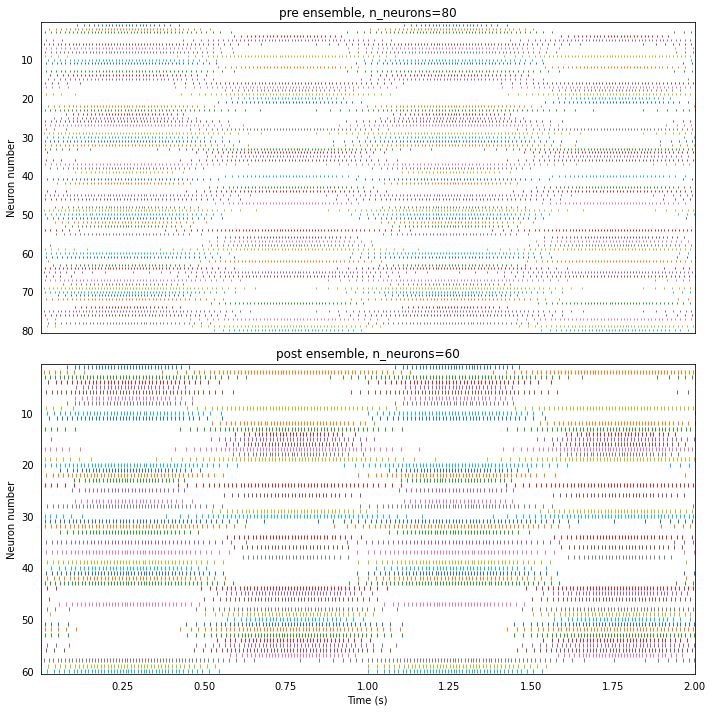

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
from nengo.utils.matplotlib import rasterplot
import nengo_loihi

# All Nengo Loihi models should call this before model construction
nengo_loihi.set_defaults()

with nengo.Network(label="Communication channel") as model:
    stim = nengo.Node(lambda t: np.sin(2*np.pi*t))

    pre = nengo.Ensemble(n_neurons=80, dimensions=1)
    post = nengo.Ensemble(n_neurons=60, dimensions=1)

    # Connect the stim input to the first ensemble
    nengo.Connection(stim, pre)

    # Connect the first ensemble to the second
    # (this is the communication channel)
    nengo.Connection(pre, post)

    stim_probe = nengo.Probe(stim)
    # Probing an ensemble gives the decoded value
    pre_probe = nengo.Probe(pre, synapse=.01)
    post_probe = nengo.Probe(post, synapse=.01)
    # We can also probe their neurons directly to see their firing patterns
    pre_n_probe = nengo.Probe(pre.neurons)
    post_n_probe = nengo.Probe(post.neurons)
    
def plot_decoded(t, data):
    plt.figure(figsize=(5, 7))
    plt.subplot(3, 1, 1)
    plt.title("Input")
    plt.plot(t, data[stim_probe])
    plt.xticks(())
    plt.subplot(3, 1, 2)
    plt.title("pre")
    plt.plot(t, data[pre_probe])
    plt.xticks(())
    plt.subplot(3, 1, 3)
    plt.title("post")
    plt.plot(t, data[post_probe])
    plt.xlabel("Time (s)")
    plt.tight_layout()
    
def plot_rasters(t, data):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    rasterplot(t, data[pre_n_probe])
    plt.title("pre ensemble, n_neurons={}".format(pre.n_neurons))
    plt.ylabel("Neuron number")
    plt.xticks(())
    plt.subplot(2, 1, 2)
    rasterplot(t, data[post_n_probe])
    plt.title("post ensemble, n_neurons={}".format(post.n_neurons))
    plt.ylabel("Neuron number")
    plt.xlabel("Time (s)")
    plt.tight_layout()

    
with nengo_loihi.Simulator(model, precompute=True) as sim:
    sim.run(2.)
t = sim.trange()
plot_decoded(t, sim.data)
plot_rasters(t, sim.data)
